In [1]:
import numpy as np
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
import evoc
from sklearn.metrics import adjusted_rand_score as ari


import APALD

np.random.seed(1234)

/Users/ryandewolfe/miniforge3/envs/PALD/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/ryandewolfe/miniforge3/envs/PALD/lib/python3.12/site-packages/evoc/float_nndescent.py:287: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  points = point_indices[i]


## Load the vectorized data. If these files do not exist run `newgroups_preprocess.ipynb`

In [2]:
we_vectors = np.load("news_vectors.npy")
targets = np.load("news_labels.npy")

# Cut down dataset of the sake of computer

In [3]:
groups = [0, 2, 6, 9, 11, 14]  # Chosen to not be similar
docs_per_group = 400

keep = np.zeros_like(targets, dtype="bool")
for group in groups:
    this_group = (targets == group)
    random_selection = np.random.choice(this_group.nonzero()[0], docs_per_group, replace=False)
    for j in random_selection:
        keep[j] = True

labels = targets[keep]
data = we_vectors[keep, :]

print(labels.shape)
print(data.shape)

(2400,)
(2400, 160)


CPU times: user 8.09 s, sys: 154 ms, total: 8.24 s
Wall time: 5.21 s


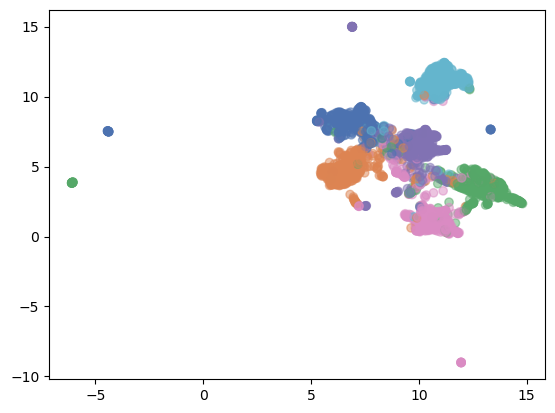

In [4]:
%%time
mapper = umap.UMAP()
data_map = mapper.fit_transform(data)
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.scatter(data_map[:, 0], data_map[:, 1], c=colors, alpha=0.5)

## Comparing UMAP + Clustering

HDBSCAN
APALD


240000it [00:02, 112680.67it/s]


Text(0.05, 0.95, 'ARI: 1.0')

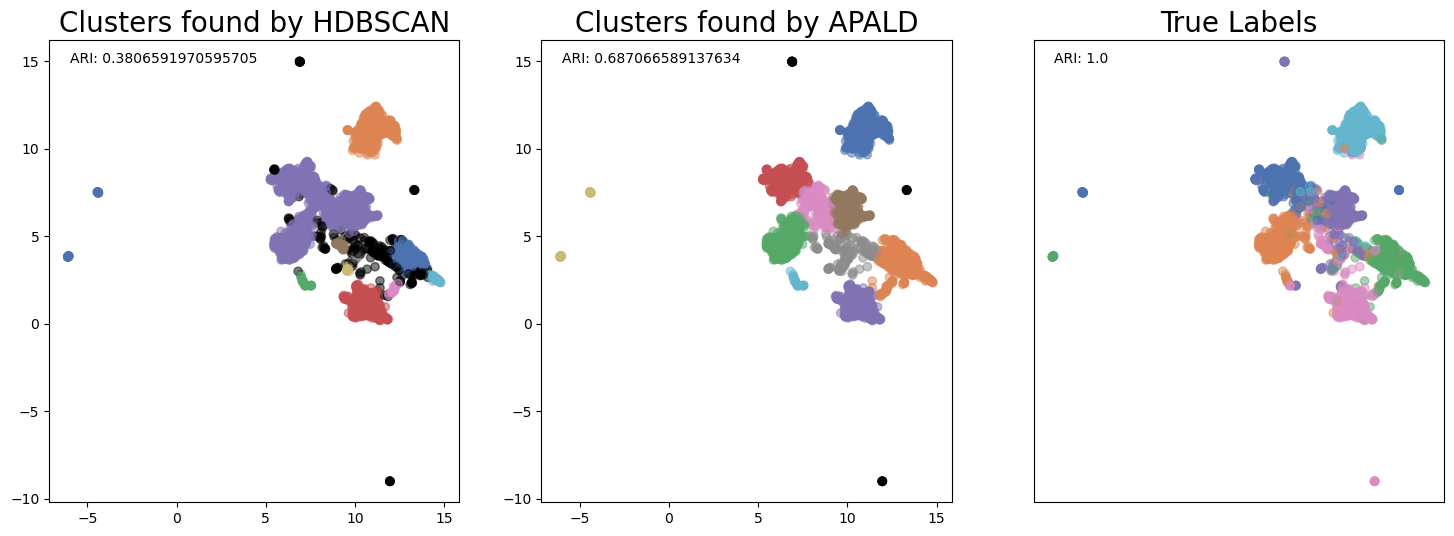

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# HDBSCAN
print("HDBSCAN")
predict = hdbscan.HDBSCAN(min_cluster_size=15).fit_predict(data_map)
palette = sns.color_palette('deep', np.unique(predict).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
ax[0].scatter(data_map.T[0], data_map.T[1], c=colors, alpha=0.5)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[0].set_title('Clusters found by HDBSCAN', fontsize=20)
ax[0].annotate(f"ARI: {ari(predict, labels)}", xy=(0.05, 0.95), xycoords="axes fraction")

# PALD
print("APALD")
predict = APALD.APALD(metric="euclidean").fit_predict(data_map)
palette = sns.color_palette('deep', np.unique(predict).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
ax[1].scatter(data_map.T[0], data_map.T[1], c=colors, alpha=0.5)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[1].set_title('Clusters found by APALD', fontsize=20)
ax[1].annotate(f"ARI: {ari(predict, labels)}", xy=(0.05, 0.95), xycoords="axes fraction")

# Labels
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
ax[2].scatter(data_map.T[0], data_map.T[1], c=colors, alpha=0.5)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[2].set_title('True Labels', fontsize=20)
ax[2].annotate(f"ARI: {ari(labels, labels)}", xy=(0.05, 0.95), xycoords="axes fraction")

## Cluster in High Space then Show UMAP plot

EVoC
APALD


240000it [00:02, 115904.84it/s]


Text(0.05, 0.95, 'ARI: 1.0')

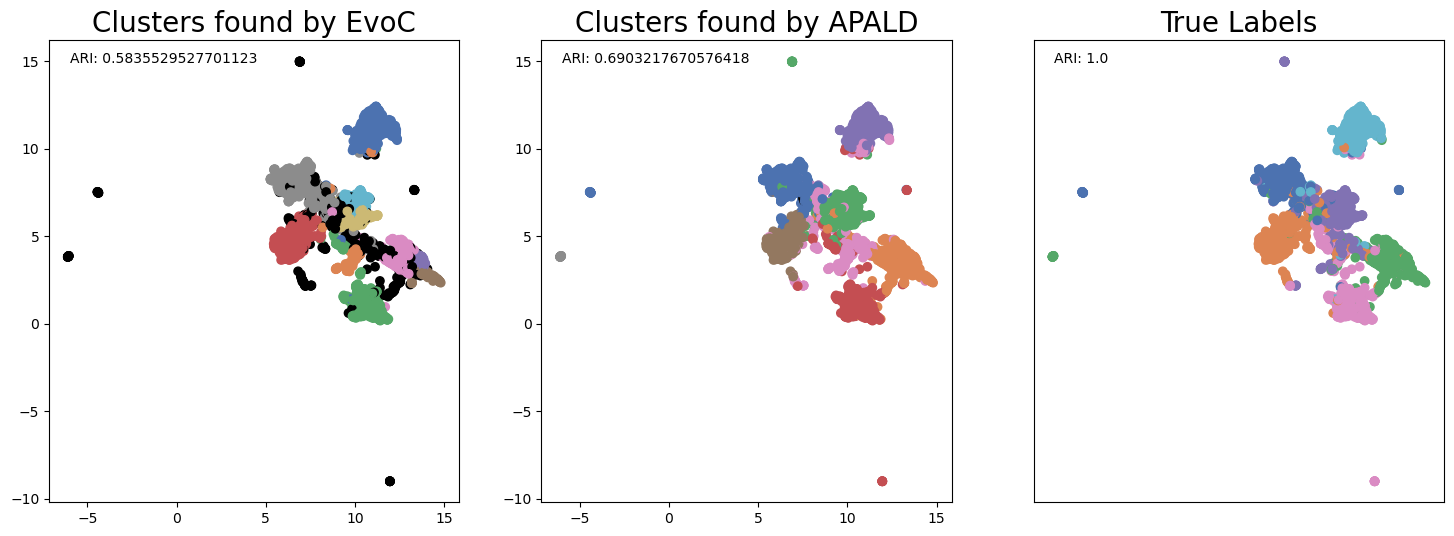

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# EVoC
print("EVoC")
predict = evoc.EVoC().fit_predict(data)
palette = sns.color_palette('deep', np.unique(predict).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
ax[0].scatter(data_map.T[0], data_map.T[1], c=colors)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[0].set_title('Clusters found by EvoC', fontsize=20)
ax[0].annotate(f"ARI: {ari(predict, labels)}", xy=(0.05, 0.95), xycoords="axes fraction")

# PALD
print("APALD")
predict = APALD.APALD().fit_predict(data)
palette = sns.color_palette('deep', np.unique(predict).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
ax[1].scatter(data_map.T[0], data_map.T[1], c=colors)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[1].set_title('Clusters found by APALD', fontsize=20)
ax[1].annotate(f"ARI: {ari(predict, labels)}", xy=(0.05, 0.95), xycoords="axes fraction")

# Labels
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
ax[2].scatter(data_map.T[0], data_map.T[1], c=colors)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[2].set_title('True Labels', fontsize=20)
ax[2].annotate(f"ARI: {ari(labels, labels)}", xy=(0.05, 0.95), xycoords="axes fraction")